## **MODELO PARA EVASÃO DE CLIENTES - KERAS | VERSÃO CEF **

#### IMPORTANDO AS BIBLIOTECAS DO PROJETO

In [0]:
# Bibliotecas Utilizadas no Projeto

import warnings
warnings.filterwarnings('ignore')

# Bibliotecas para construção da Rede Neural
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model

# Bibliotecas para processamento de Dados
import numpy as np
import pandas as pd

# Importando biblioteca para Pré-Processamento e Enconding dos Dados
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split

# Bibliotecas para visualização de Dados
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### CARREGANDO O DATASET

In [0]:
# Carregando o dataset
file = 'https://gist.githubusercontent.com/jsturiao/164d2af04dcd235f3adcf45f7112baa8/raw/151481b004649a88d2118a6501d1d254eb85a5f8/Churn_Model.csv'
dataset = pd.read_csv(file)

#### EXPLORAÇÃO E VISUALIZAÇÃO DE DADOS

In [0]:
# Mostrando as 5 primeiras linhas do dataset
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [0]:
# Aqui iremos visualizar o shape do nosso dataset, ou seja, quantas colunas e quantas linhas temos.
dataset.shape

(10000, 14)

In [0]:
# Aqui temos uma analise descritiva das variáveis do nosso dataset. Dados importantes como media, desvio padrao, minimo, maximo, quartis, quantidade e etc.
dataset.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [0]:
# Aqui temos a tabela de correlação, onde tentamos encontrar correlação entre as variáveis.
dataset.corr().round(4)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.0000,0.0042,0.0058,0.0008,-0.0065,-0.0091,0.0072,0.0006,0.0120,-0.0060,-0.0166
CustomerId,0.0042,1.0000,0.0053,0.0095,-0.0149,-0.0124,0.0170,-0.0140,0.0017,0.0153,-0.0062
CreditScore,0.0058,0.0053,1.0000,-0.0040,0.0008,0.0063,0.0122,-0.0055,0.0257,-0.0014,-0.0271
Age,0.0008,0.0095,-0.0040,1.0000,-0.0100,0.0283,-0.0307,-0.0117,0.0855,-0.0072,0.2853
Tenure,-0.0065,-0.0149,0.0008,-0.0100,1.0000,-0.0123,0.0134,0.0226,-0.0284,0.0078,-0.0140
Balance,-0.0091,-0.0124,0.0063,0.0283,-0.0123,1.0000,-0.3042,-0.0149,-0.0101,0.0128,0.1185
NumOfProducts,0.0072,0.0170,0.0122,-0.0307,0.0134,-0.3042,1.0000,0.0032,0.0096,0.0142,-0.0478
HasCrCard,0.0006,-0.0140,-0.0055,-0.0117,0.0226,-0.0149,0.0032,1.0000,-0.0119,-0.0099,-0.0071
IsActiveMember,0.0120,0.0017,0.0257,0.0855,-0.0284,-0.0101,0.0096,-0.0119,1.0000,-0.0114,-0.1561
EstimatedSalary,-0.0060,0.0153,-0.0014,-0.0072,0.0078,0.0128,0.0142,-0.0099,-0.0114,1.0000,0.0121


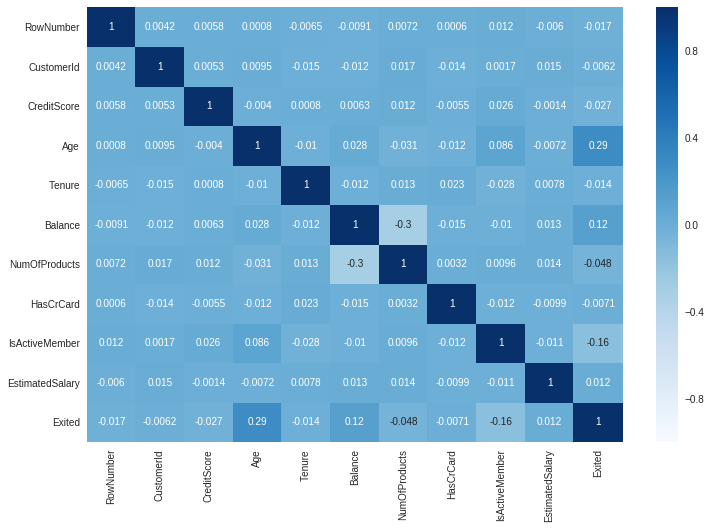

In [0]:
# Aqui temos de forma gráfica a matriz de correlação, que tinhamos visto acima, no formato tabular.
# Essa visualização nos permite inferir as correlações existentes entre as variáveis. Obviamente qualquer inferência precisa posteriormente ser provada formalmente.
plt.subplots(figsize = (12, 8))
sns.heatmap(dataset.corr().round(4), annot = True, cmap = 'Blues')
plt.show()

In [0]:
sairam = dataset.Exited[dataset['Exited'] == 1].count()
ficaram = dataset.Exited[dataset['Exited'] == 0].count()
print('Sairam', sairam)
print('Ficaram', ficaram)

Sairam 2037
Ficaram 7963


In [0]:
HasCrCard = dataset.query('HasCrCard == 1')
teste = teste.groupby('Exited').count()
teste = pd.DataFrame(teste['HasCrCard'])
teste

,HasCrCard
Exited,
0,5631
1,1424


In [0]:
teste = dataset.query('HasCrCard == 0')
teste = teste.groupby('Exited').count()
teste = pd.DataFrame(teste['HasCrCard'])
teste

,HasCrCard
Exited,
0,2332
1,613


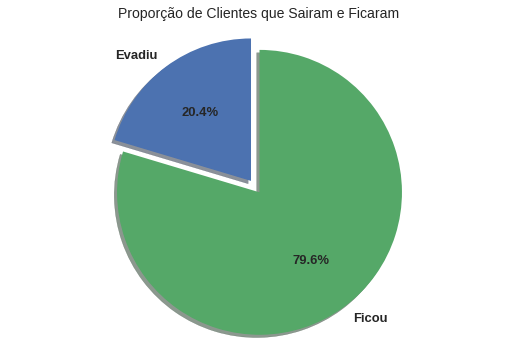

In [0]:
# Visualizamos a Proporção de Clientes que Evadiram e Ficaram
labels = 'Evadiu', 'Ficou'
sizes = [dataset.Exited[dataset['Exited'] == 1].count(), dataset.Exited[dataset['Exited'] == 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize = (9, 6))
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, textprops = {'fontsize': 13, 'weight': 'bold'})
ax1.axis('equal')
plt.title('Proporção de Clientes que Sairam e Ficaram', size = 14)
plt.show()

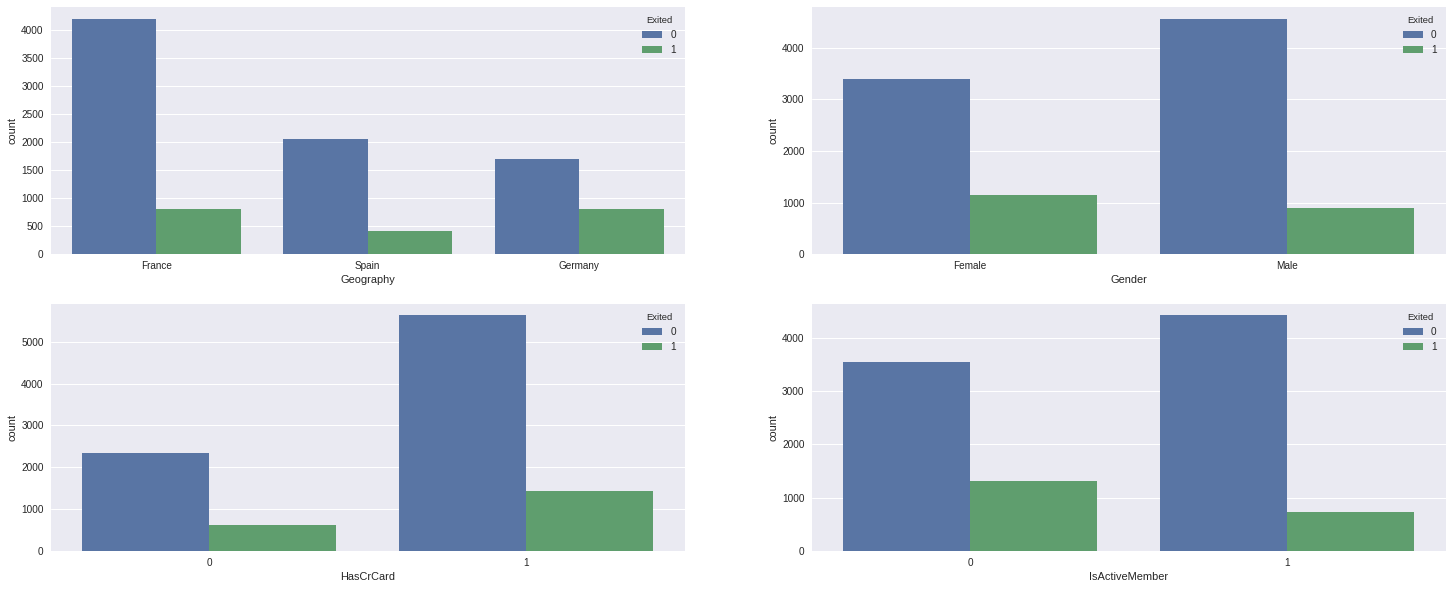

In [0]:
# Vamos analisar a correlação de algumas variáveis binárias com a saída do cliente
fig, axarr = plt.subplots(2, 2, figsize = (25, 10))
sns.countplot(x = 'Geography', hue = 'Exited',data = dataset, ax = axarr[0][0])
sns.countplot(x = 'Gender', hue = 'Exited',data = dataset, ax = axarr[0][1])
sns.countplot(x = 'HasCrCard', hue = 'Exited',data = dataset, ax = axarr[1][0])
sns.countplot(x = 'IsActiveMember', hue = 'Exited',data = dataset, ax = axarr[1][1])

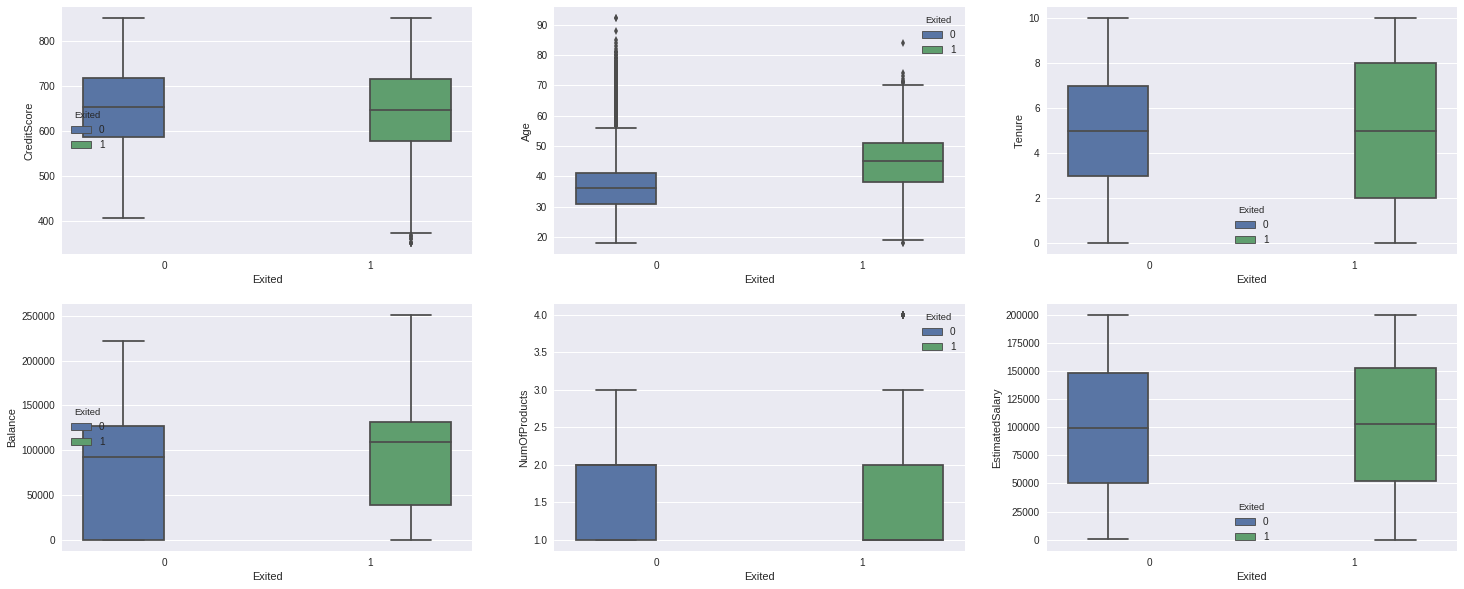

In [0]:
# Relação baseada em atributos contínuos: Score de Credito, Idade, Tempo de Relacionamento, Saldo, Numero de Produtos e Salario Estimado
fig, axarr = plt.subplots(2, 3, figsize = (25, 10))
sns.boxplot(y = 'CreditScore', x = 'Exited', hue = 'Exited', data = dataset, ax = axarr[0][0])
sns.boxplot(y = 'Age', x = 'Exited', hue = 'Exited', data = dataset , ax = axarr[0][1])
sns.boxplot(y = 'Tenure', x = 'Exited', hue = 'Exited', data = dataset, ax = axarr[0][2])
sns.boxplot(y = 'Balance', x = 'Exited', hue = 'Exited', data = dataset, ax = axarr[1][0])
sns.boxplot(y = 'NumOfProducts', x = 'Exited', hue = 'Exited', data = dataset, ax = axarr[1][1])
sns.boxplot(y = 'EstimatedSalary', x = 'Exited', hue = 'Exited', data = dataset, ax = axarr[1][2])

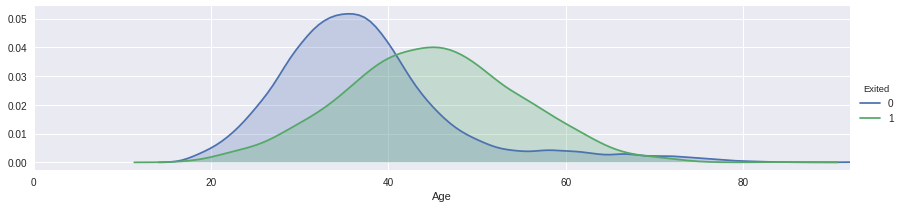

In [0]:
# Visualização do comportamento da variável Idade em relação à variável Saida (Exited)
facet = sns.FacetGrid(dataset, hue = 'Exited', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, dataset['Age'].max()))
facet.add_legend()
plt.show()

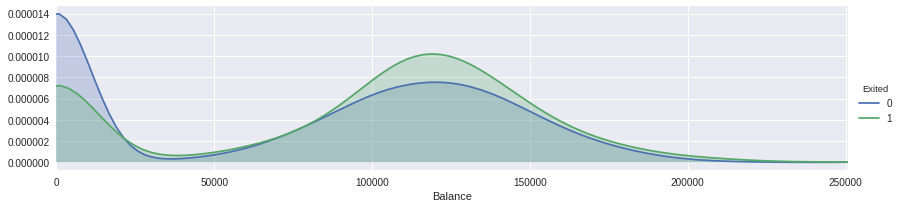

In [0]:
# Visualização do comportamento da variável Saldo em relação à variável Saida (Exited)
facet = sns.FacetGrid(dataset, hue = 'Exited', aspect = 4)
facet.map(sns.kdeplot, 'Balance', shade = True)
facet.set(xlim = (0, dataset['Balance'].max()))
facet.add_legend()
plt.show()

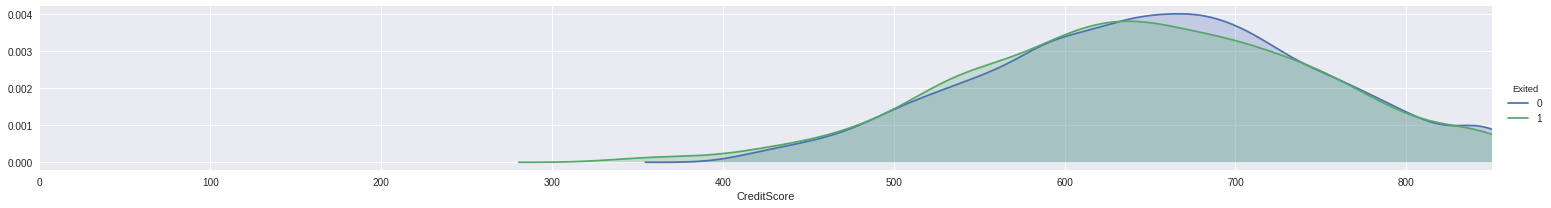

In [0]:
# Visualização do comportamento da variável Score de Crédito em relação à variável Saida (Exited)
facet = sns.FacetGrid(dataset, hue = 'Exited', aspect = 7)
facet.map(sns.kdeplot, 'CreditScore', shade = True)
facet.set(xlim = (0, dataset['CreditScore'].max()))
facet.add_legend()
plt.show()

#### PROCESSAMENTO DE DADOS

In [0]:
# Divisão do Dataset em Variáveis Independentes e Variáveis Dependentes
# Variáveis Independentes - Features ou Inputs
# Variáveis Dependentes - Classe de Saída ou Output
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [0]:
df = pd.DataFrame(X)
df.head(10)

,0,1,2,3,4,5,6,7,8,9
0,619,France,Female,42,2,0,1,1,1,101349
1,608,Spain,Female,41,1,83807.9,1,0,1,112543
2,502,France,Female,42,8,159661,3,1,0,113932
3,699,France,Female,39,1,0,2,0,0,93826.6
4,850,Spain,Female,43,2,125511,1,1,1,79084.1
5,645,Spain,Male,44,8,113756,2,1,0,149757
6,822,France,Male,50,7,0,2,1,1,10062.8
7,376,Germany,Female,29,4,115047,4,1,0,119347
8,501,France,Male,44,4,142051,2,0,1,74940.5
9,684,France,Male,27,2,134604,1,1,1,71725.7


In [0]:
# Codificando a Variável Independente Pais, de Categorica para Binária.
# Será acrescentada mais 1 coluna no dataset, ficando assim 2 colunas para representar o pais.
# Sera um array de 3 posições.
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [0]:
# Codificando a Variável Independente Genero, de Categorica para Binária.
# Neste caso, os 2 valores categóricos, serão transformados em 2 valores binários.
# Male será convertido para 1
# Female será convertido para 0
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [0]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [0]:
df = pd.DataFrame(X)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,1.0,0.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,1.0,0.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
5,1.0,0.0,645.0,1.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71
6,0.0,0.0,822.0,1.0,50.0,7.0,0.00,2.0,1.0,1.0,10062.80
7,0.0,1.0,376.0,0.0,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88
8,0.0,0.0,501.0,1.0,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50
9,0.0,0.0,684.0,1.0,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73


In [0]:
# Dividindo o dataset em Conjunto de Treinamento e Conjunto de Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# A recomendação de normalizar os atributos vem do fato de utilizamos ranges com escalas diferentes. Ex: Idade, Salario, etc.
# De forma geral, o que é feito aqui é o seguinte: 
# Variavel Padronizada = (variavel original - media da variavel original) / desvio padrão da variavel original
# A variavel original, subtraida pela sua média, e dividida pelo seu desvio padrão. Isso faz com que os valores fiquem normalizados, evitando vieses enganosos.
# Sem a padronização, temos uma perda de 10% na acurácia do nosso algoritmo

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Visualizamos como nosso conjunto de dados será enviado para alimentar a rede neural.
df = pd.DataFrame(X_train)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1.743090,-0.569844,0.169582,-1.091687,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432
1,-0.573694,1.754865,-2.304559,0.916013,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664
2,-0.573694,-0.569844,-1.191196,-1.091687,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335
3,1.743090,-0.569844,0.035566,0.916013,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528
4,1.743090,-0.569844,2.056114,-1.091687,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378
5,-0.573694,1.754865,1.293254,-1.091687,-0.177495,-1.031415,0.442535,0.809503,0.642595,-1.032270,1.632521
6,-0.573694,-0.569844,1.612831,0.916013,0.779547,-1.377440,0.304328,-0.921591,-1.556190,-1.032270,0.481496
7,1.743090,-0.569844,-0.541734,0.916013,0.205321,1.044737,-1.215717,0.809503,0.642595,0.968738,1.073822
8,1.743090,-0.569844,-0.149995,0.916013,3.554968,1.390762,0.806330,-0.921591,0.642595,0.968738,-1.049498
9,-0.573694,-0.569844,-0.294320,-1.091687,-0.656016,0.352686,1.486364,0.809503,0.642595,-1.032270,0.015394


#### CONSTRUINDO O MODELO

In [0]:
# Aqui definimos os parametros da nossa rede neural
model = keras.Sequential([
    keras.layers.Dense(units = 9, activation = 'relu', input_dim = 11),
    keras.layers.Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'),
    keras.layers.Dense(units = 1, activation = 'sigmoid')
])

### PARÂMETROS DA REDE

# optmizer = Algoritmo que será utilizado para encontrar o melhor conjunto de pesos na Rede Neural. lr = Learning Rating = O Quão rapido o algoritmo irá realizar o ajuste de seus pesos
optimizer = keras.optimizers.Adam(lr = 0.002)

# loss = Algoritmo que irá calcular a perda, ou seja a diferença entre o valor predito e o valor real.
loss = 'binary_crossentropy'

# metrics = Tipo de Métrica Utilizada para medir o desempenho da Rede
metrics = ['accuracy']

# Isso faz com que o modelo pare de treinar assim que ele começar a piorar. Congela ele no melhor momento, ou seja, na melhor combinação de parâmetros.
earlyStopping = [keras.callbacks.EarlyStopping(monitor = 'val_loss'), keras.callbacks.ModelCheckpoint(filepath = 'bestModel.hdf5', monitor = 'val_loss', save_best_only = True)]

# Compilamos nosso modelo, dizendo qual algoritmo iremos utilizar como otimizador, qual iremos utilizar para ajuste de perda e qual tipo de métrica queremos observar.
model.compile(optimizer, loss, metrics)

# Quantidade de dados que será analisada em cada época
batch_size = 10

# Quantidade máxima de épocas que nosso algoritmo irá treinar. Chamamos de época o ciclo completo de forward e back propagation
epochs = 30

# Nossos dados de treinamento. Variáveis de Entrada
trainingInputs = X_train

# Nossos dados de treinamento. Variáveis de Saída
trainingOutputs = y_train

# Realizamos o treinamento e guardamos os parametros (Pesos e Tendencias)
trainedModel = model.fit(trainingInputs, trainingOutputs, batch_size, epochs, validation_split = 0.25, callbacks = earlyStopping)

Train on 6000 samples, validate on 2000 samples
Epoch 1/30
6000/6000 [==============================] - 6s 986us/sample - loss: 0.4779 - acc: 0.7933 - val_loss: 0.4437 - val_acc: 0.7995
Epoch 2/30
6000/6000 [==============================] - 1s 224us/sample - loss: 0.4300 - acc: 0.7992 - val_loss: 0.4351 - val_acc: 0.8125
Epoch 3/30
6000/6000 [==============================] - 1s 224us/sample - loss: 0.4199 - acc: 0.8237 - val_loss: 0.4219 - val_acc: 0.8220
Epoch 4/30
6000/6000 [==============================] - 1s 223us/sample - loss: 0.4105 - acc: 0.8315 - val_loss: 0.4178 - val_acc: 0.8240
Epoch 5/30
6000/6000 [==============================] - 1s 220us/sample - loss: 0.4059 - acc: 0.8322 - val_loss: 0.4167 - val_acc: 0.8275
Epoch 6/30
6000/6000 [==============================] - 1s 225us/sample - loss: 0.4024 - acc: 0.8335 - val_loss: 0.4114 - val_acc: 0.8285
Epoch 7/30
6000/6000 [==============================] - 1s 225us/sample - loss: 0.3999 - acc: 0.8365 - val_loss: 0.4106 - va

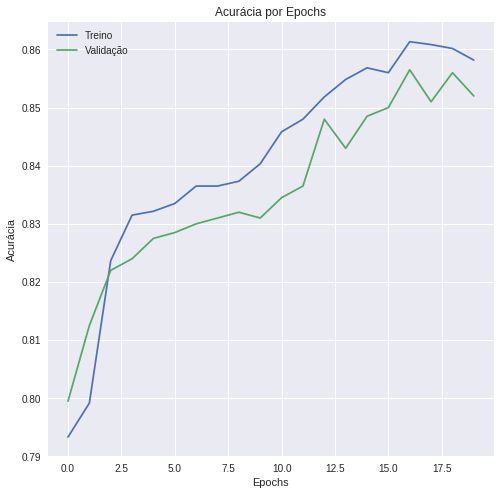

In [0]:
# Aqui visualizamos a progressão da nossa acurácia. Repare que ela aumenta conforme as épocas vão avançando.
# Isso faz todo sentido, uma vez que os ajustes vão sendo realizados nos neurônios (Pesos e Tendencias).
plt.subplots(figsize = (8, 8))
plt.plot(trainedModel.history['acc'])
plt.plot(trainedModel.history['val_acc'])
plt.title('Acurácia por Epochs')
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

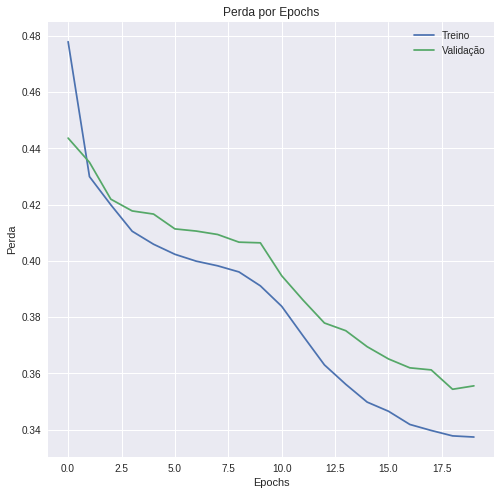

In [0]:
# Aqui visualizamos a progressão da nossa perda. Tanto de treino como de validação. Ela deve fazer o caminho inverso da acurácia, ja que uma deve cair para outra subir.
# Falando por alto, essa perda que nos referimos aqui, é o quando estamos errando em nossa predição. Repare que a perda cai conforme as épocas vão avançando.
plt.subplots(figsize = (8, 8))
plt.plot(trainedModel.history['loss'])
plt.plot(trainedModel.history['val_loss'])
plt.title('Perda por Epochs')
plt.xlabel('Epochs')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

#### FAZENDO PREDIÇÕES E AVALIANDO O MODELO

In [0]:
# Testando nosso modelo no conjunto de teste
y_pred = model.predict(X_test)

In [0]:
# Convertendo o array com as probabilidades em um Data Frame
# O modelo nos retorna um array com as probabilidades de cada cliente evadir. Com base nisso, montamos nossa estratégia de retenção.
df_y_pred = pd.DataFrame(y_pred)

# Mostrando as 5 primeiras linhas
df_y_pred.head(10)

,0
0,0.366682
1,0.356795
2,0.247490
3,0.105012
4,0.110615
5,0.921079
6,0.037953
7,0.078116
8,0.326234
9,0.925057


<Figure size 432x288 with 0 Axes>

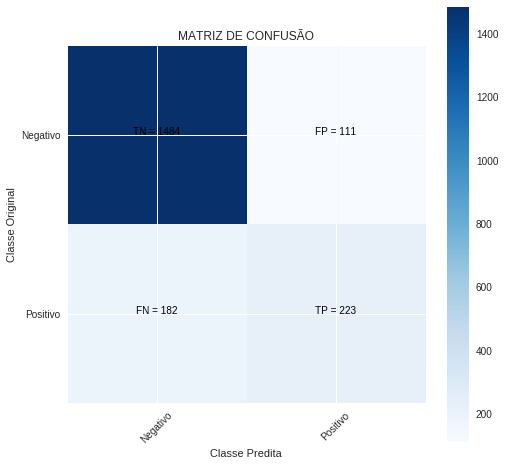

In [0]:
plt.clf()
plt.subplots(figsize = (8, 8))
cm = confusion_matrix(y_test, y_pred.round())
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
classNames = ['Negativo', 'Positivo']
plt.title('MATRIZ DE CONFUSÃO')
plt.ylabel('Classe Original')
plt.xlabel('Classe Predita')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+' = '+str(cm[i][j]), horizontalalignment = 'center', color = 'black')
plt.show()

In [0]:
# Detalhamento da Matriz de Confusão
print('TN - Verdadeiro Negativos: ', cm[0][0]) # O que realmente eram negativos. Ou seja, o modelo disse que não iam evadir e realmente não evadiram.
print('FP - Falsos Positivos: ', cm[0][1]) # O modelo considerou como positivos mas eram negativos. Ou seja, o modelo disse que iriam evadir, mas não evadiram.
print('FN - Falsos Negativos: ', cm[1][0]) # O modelo considerou como negativos mas eram positivos. Ou seja, o modelo disse que não iriam evadir, mas evadiram.
print('TP - Verdadeiro Positivo: ', cm[1][1]) # O que realmente eram positivos. Ou seja, o modelo disse que iriam evadir e realmente evadiram.

TN - Verdadeiro Negativos:  1484
FP - Falsos Positivos:  111
FN - Falsos Negativos:  182
TP - Verdadeiro Positivo:  223


In [0]:
# Relatório de Classificação. Aqui temos um detalhamento maior das métricas obtidas.
print(classification_report(y_test, y_pred.round()))
acuracia = accuracy_score(y_test, y_pred.round())
print('Acurácia Média : %0.2f' % (acuracia * 100))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.67      0.55      0.60       405

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.85      0.85      2000

Acurácia Média : 85.35


#### TESTANDO O MODELO

In [0]:
# DADOS SOBRE PAIS:
# ## FRANÇA: 0, 0
# ## ESPANHA: 0, 1
# ## ALEMANHA: 1, 0

# Especificamos os dados
Pais0 = 0.0
Pais1 = 0.0
ScoreCredito = 200
Genero = 1
Idade = 70
Relacionamento = 1
Saldo = 10000
QtdProdutos = 1
CartaoCredito = 1
Ativo = 1
Salario = 10000

# Carregamos em um array e fazemos a transformação
data = sc.transform(np.array([[Pais0, Pais1, ScoreCredito, Genero, Idade, Relacionamento, Saldo, QtdProdutos, CartaoCredito, Ativo, Salario]]))

# Fazemos o predict usando o modelo já treinado e guardamos o resultado na variavel new_prediction
new_prediction = model.predict(data)

# O modelo irá nos devolver um percentual. Com base nisso, decidimos a partir de que percentual o cliente irá sair do banco. No caso aqui, consideramos 50%.
valor = 'Sim' if (new_prediction > 0.5) else 'Não'
    
print('Cliente Irá Sair ?', valor)
print('Qual a Probabilidade do Cliente Sair: ', '%.2f' % (new_prediction * 100))

Cliente Irá Sair ? Não
Qual a Probabilidade do Cliente Sair:  14.36


#### SALVANDO E EXPORTANDO O MODELO

In [0]:
# Salvamos o modelo para uso posterior
model.save('model.h5')

# Para carregar o modelo, basta utilizar a funcoa load_model()
savedModel = load_model('model.h5')